In [4]:
import numpy as np
import bilby
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [5]:
# General settings
import matplotlib as mpl
mpl.rc_file('/Users/ulyana/Documents/PhDThesisPlots/matplotlibrc')

In [6]:
mpl.rc('xtick', labelsize = 21) 
mpl.rc('ytick', labelsize = 21)

In [7]:
my_color = '#4c7f7f'
my_bin_num = 50

In [8]:
lbs_dict = {'H0':'$H_0$ [km s$^{-1}$ Mpc$^{-1}$]', 
        'Om0':'$\\Omega_{\\rm m,0}$', 
        'alpha':'$\\alpha$', 
        'beta':'$\\beta$', 
        'mmin':'$m_{\\rm min}$ [$M_{\odot}$]', 
        'mmax':'$m_{\\rm max}$ [$M_{\odot}$]', 
        'delta_m':'$\\delta m$ [$M_{\odot}$]', 
        'mu_g':'$\\mu_{\\rm g}$ [$M_{\odot}$]', 
        'sigma_g':'$\\sigma_{\\rm g}$ [$M_{\odot}$]', 
        'lambda_peak':'$\\lambda_{\\rm peak}$', 
        'gamma':'$\gamma$', 
        'kappa':'$\kappa$', 
        'zp':'$z_{\\rm p}$', 
        'R0':'$R_0$ [Gpc$^{-3}$yr$^{-1}$]'}

In [9]:
# load dictionary of events
case2_dictionary_path = 'data/case2_events_dictionary.pkl'
with open(case2_dictionary_path, 'rb') as f:
    case2_dict = pickle.load(f)

In [10]:
event = case2_dict['case2_inj_number']['case2_1e6inj_80ev']

columns_lbs = ['H0', 'Om0', 'alpha', 'beta', 'mmin', 'mmax', 'delta_m', 'mu_g', 'sigma_g', 'lambda_peak',
               'gamma', 'kappa', 'zp', 'R0']
data = bilby.core.result.read_in_result(event)
data_posteriors = data.posterior[columns_lbs]

In [11]:
def mu_g_redshift(z):
    return 40.9 + 2.84*z

def sigma_g_redshift(z):
    return 7.63 + 2.7*z

## $\mu_g$ plot

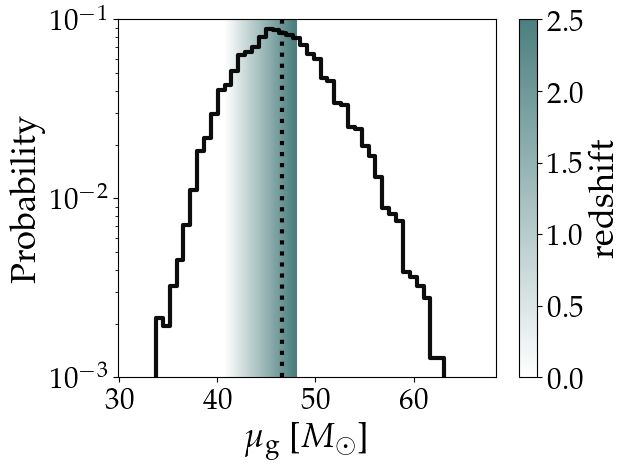

In [15]:
param = 'mu_g'
param_median = np.median(data_posteriors[param])
max_z = 2.5

cmap = LinearSegmentedColormap.from_list("custom_cmap", ["white", my_color])
colors = cmap(np.linspace(0, 1, 100))

fig, ax = plt.subplots(1,1)

zz = np.linspace(0, max_z, 100)
xx = mu_g_redshift(zz)
for i in range(100):
    plt.axvline(xx[i], color=colors[i])

bounds = np.linspace(0, max_z, 10)
norm = mpl.colors.Normalize(vmin=0, vmax=max_z) 
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm) 
sm.set_array([])   

cbar = fig.colorbar(sm, ax=plt.gca())
cbar.set_label('redshift', fontsize=25)

sns.histplot(data_posteriors[param], bins = my_bin_num, fill = False, stat = 'density',
            alpha = 0.95, element = 'step', color = 'black',
            linewidth = 3.0)
plt.axvline(param_median, color='black', linestyle='dotted', linewidth=3.)
plt.yscale('log')

plt.xlabel('%s' %lbs_dict[param], fontsize = 25)
plt.ylabel('Probability', fontsize = 25)
plt.ylim(1e-3, 0.1)


fig.tight_layout()

plt.savefig('plots/posteriors_%s.pdf' %param, bbox_inches='tight')
plt.show()
plt.close()

## $\sigma_g$ plot

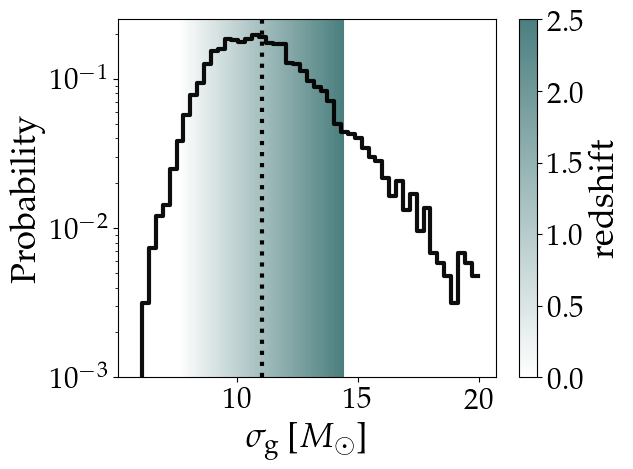

In [16]:
param = 'sigma_g'
param_median = np.median(data_posteriors[param])

max_z = 2.5
cmap = LinearSegmentedColormap.from_list("custom_cmap", ["white", my_color])
colors = cmap(np.linspace(0, 1, 100))

fig, ax = plt.subplots(1,1)

zz = np.linspace(0, max_z, 100)
xx = sigma_g_redshift(zz)
for i in range(100):
    plt.axvline(xx[i], color=colors[i])

bounds = np.linspace(0, max_z, 10)
norm = mpl.colors.Normalize(vmin=0, vmax=max_z) 
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm) 
sm.set_array([])   

cbar = fig.colorbar(sm, ax=plt.gca())
cbar.set_label('redshift', fontsize=25)

sns.histplot(data_posteriors[param], bins = my_bin_num, fill = False, stat = 'density',
            alpha = 0.95, element = 'step', color = 'black',
            linewidth = 3.0)
plt.axvline(param_median, color='black', linestyle='dotted', linewidth=3.)
plt.yscale('log')

plt.xlabel('%s' %lbs_dict[param], fontsize = 25)
plt.ylabel('Probability', fontsize = 25)
plt.ylim(1e-3, 0.25)

fig.tight_layout()

plt.savefig('plots/posteriors_%s.pdf' %param, bbox_inches='tight')
plt.show()
plt.close()